In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv('data.csv')

In [62]:
df

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No
...,...,...,...
95,"4,3",200.0,No
96,"4,4",42.0,No
97,"6,7",182.0,Yes
98,"6,3",103.0,Yes


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [64]:
df.shape

(100, 3)

## CGPA Analysis

In [65]:
df['cgpa']=df['cgpa'].str.replace(',','.',regex=True)

In [66]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No


In [67]:
df['cgpa'].dtype

dtype('O')

In [68]:
df['cgpa'] = pd.to_numeric(df['cgpa'], errors='coerce')


In [69]:
df['cgpa'].isnull().sum()

5

In [70]:
df['cgpa']=df['cgpa'].fillna(df['cgpa'].mean())

In [71]:
df['cgpa'].astype(int)

0     6
1     5
2     5
3     7
4     5
     ..
95    4
96    4
97    6
98    6
99    6
Name: cgpa, Length: 100, dtype: int32

In [73]:
df['cgpa'].head(5)

0    6.8
1    5.9
2    5.3
3    7.4
4    5.8
Name: cgpa, dtype: float64

In [72]:
df['cgpa'].isnull().sum()

0

## Placement 

In [74]:
df['placement'].isnull().sum()

0

In [75]:
df['placement'].head(5)

0    Yes
1     No
2     No
3    Yes
4     No
Name: placement, dtype: object

In [76]:
df1=df['placement'].replace(['Yes','No'],[1,0])

In [77]:
df1.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [78]:
df['placement']=df1

In [79]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## EDA

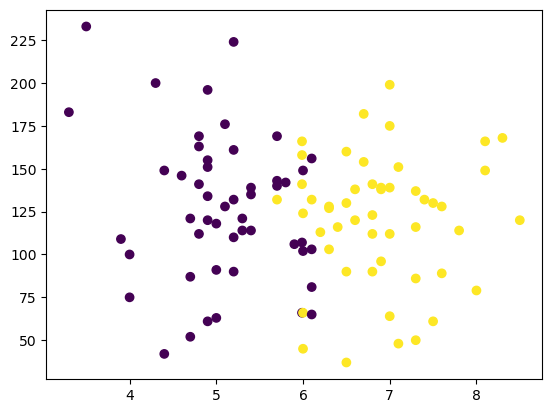

In [82]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

# Model Training

In [83]:
X=df.iloc[:,0:2]

In [84]:
y=df['placement']

In [85]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [86]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20)

In [89]:
X_train

,cgpa,iq
21,7.1,151.0
1,5.9,106.0
96,4.4,42.0
69,8.5,120.0
19,5.2,132.0
...,...,...
28,5.2,90.0
95,4.3,200.0
15,5.1,176.0
90,7.3,86.0


In [90]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [93]:
X_train=scaler.fit_transform(X_train)

In [94]:
X_test=scaler.fit_transform(X_test)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model=LogisticRegression()

In [97]:
model.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_pre=model.predict(X_test)

In [100]:
y_test

70    1
74    1
2     0
44    1
56    0
48    1
12    0
36    0
0     1
49    0
76    0
93    1
88    0
92    0
5     1
77    1
23    0
63    1
87    1
38    1
37    1
51    0
35    1
65    1
31    0
Name: placement, dtype: int64

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test,y_pre)

0.96